In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

In [5]:
# import libraries
import quandl
import matplotlib.pyplot as plt
# put your api key
quandl.ApiConfig.api_key = 'vH-1ocJiGzdqi5byHY4k'
# load the data
df = quandl.get("BITFINEX/BTCJPY")

In [11]:
df

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2018-03-29,7.994363e+05,7.342434e+05,769080.0,7.706760e+05,769070.0,769090.0,11.655926
2018-03-30,7.710971e+05,6.955769e+05,719800.0,7.187839e+05,719790.0,719810.0,288.789982
2018-03-31,7.661500e+05,7.234000e+05,737820.0,7.388100e+05,737810.0,737830.0,38.338285
2018-04-01,7.451446e+05,6.837212e+05,722880.0,7.226900e+05,722640.0,723120.0,76.712521
2018-04-02,7.552932e+05,7.212312e+05,743760.0,7.416444e+05,743750.0,743770.0,54.832632
...,...,...,...,...,...,...,...
2021-03-20,6.535400e+06,6.295900e+06,6366450.0,6.363600e+06,6366300.0,6366600.0,199.009028
2021-03-21,6.381200e+06,6.034392e+06,6278500.0,6.274700e+06,6277800.0,6279200.0,302.515215
2021-03-22,6.358900e+06,5.845600e+06,5917250.0,5.917600e+06,5916900.0,5917600.0,242.728951


In [93]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split

batch_size = 39
nb_epoch = 100

if __name__ == '__main__':
    X = df.loc[:,["High","Low","Mid","Bid","Ask","Volume"]].values
    X = X[:-7]
    y = df['Last'].values
    y = y[7:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # building the model
    print('building the model ...')

    print('building the model ...')

    model = Sequential()

    model.add(Dense(22, input_shape=(4,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(11))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    
    rms = RMSprop()
    model.compile(loss='mean_absolute_error',
                  optimizer=rms,
                  metrics=['accuracy'])

    # training
    hist = model.fit(X_train, y_train,
                     batch_size=batch_size,
                     verbose=1,
                     epochs=nb_epoch,
                     validation_split=0.1)

building the model ...
building the model ...
Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 792038.0446 - accuracy: 0.0000e+00 - val_loss: 849017.5000 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 571706.3170 - accuracy: 0.0000e+00 - val_loss: 539719.2500 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 381120.8229 - accuracy: 0.0000e+00 - val_loss: 322801.9375 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 280143.7009 - accuracy: 0.0000e+00 - val_loss: 264728.8438 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 274246.8802 - accuracy: 0.0000e+00 - val_loss: 229256.6406 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 257501.3527 - accuracy: 0.0000e+00 - val_loss: 229033.8125 - val_accuracy: 0.0000e+00

Epoch 52/100
20/20 [==============================] - 0s 3ms/step - loss: 183340.2991 - accuracy: 0.0000e+00 - val_loss: 206384.1250 - val_accuracy: 0.0000e+00
Epoch 53/100
20/20 [==============================] - 0s 3ms/step - loss: 181404.7805 - accuracy: 0.0000e+00 - val_loss: 140337.2656 - val_accuracy: 0.0000e+00
Epoch 54/100
20/20 [==============================] - 0s 3ms/step - loss: 182653.2440 - accuracy: 0.0000e+00 - val_loss: 185865.4531 - val_accuracy: 0.0000e+00
Epoch 55/100
20/20 [==============================] - 0s 3ms/step - loss: 182569.6749 - accuracy: 0.0000e+00 - val_loss: 167529.9219 - val_accuracy: 0.0000e+00
Epoch 56/100
20/20 [==============================] - 0s 3ms/step - loss: 181362.3371 - accuracy: 0.0000e+00 - val_loss: 156297.3594 - val_accuracy: 0.0000e+00
Epoch 57/100
20/20 [==============================] - 0s 3ms/step - loss: 180773.8676 - accuracy: 0.0000e+00 - val_loss: 152641.3125 - val_accuracy: 0.0000e+00
Epoch 58/100
20/20 [====================

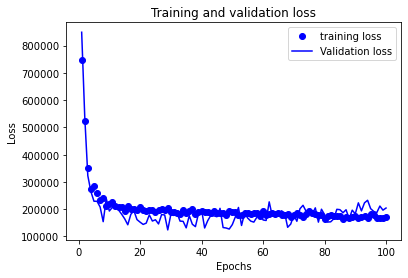

In [94]:
import matplotlib.pyplot as plt
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
Predict = model.predict(X_test, verbose=1)

7/7 [==============================] - 0s 2ms/step


In [96]:
Predict[-7:]

array([[4645063.5],
       [4869829. ],
       [5001524. ],
       [5124158.5],
       [5145301. ],
       [5398291.5],
       [5434322.5]], dtype=float32)

In [12]:
y_test

NameError: name 'y_test' is not defined

In [97]:
y_test.shape

(211,)

In [105]:
df_pre["predict"] = pd.DataFrame(Predict)

In [108]:
df_pre["y_test"] = pd.DataFrame(y_test)

In [109]:
df_pre

,predict,y_test
0,1050995.125,1.234600e+06
1,1050205.250,1.234500e+06
2,1072718.125,1.245900e+06
3,1057732.250,1.209800e+06
4,1036291.125,1.212400e+06
...,...,...
208,5145301.000,6.358223e+06
209,5398291.500,6.363600e+06
210,5434322.500,6.274700e+06
211,NaN,NaN


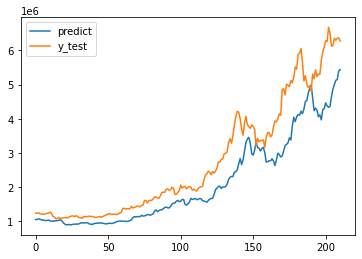

In [110]:
df_pre.plot()

In [7]:
X = df.loc[:,["High","Low","Mid","Bid","Ask","Volume"]].values
X

array([[7.99436287e+05, 7.34243351e+05, 7.69080000e+05, 7.69070000e+05,
        7.69090000e+05, 1.16559261e+01],
       [7.71097069e+05, 6.95576896e+05, 7.19800000e+05, 7.19790000e+05,
        7.19810000e+05, 2.88789982e+02],
       [7.66150000e+05, 7.23400000e+05, 7.37820000e+05, 7.37810000e+05,
        7.37830000e+05, 3.83382849e+01],
       ...,
       [6.35890000e+06, 5.84560000e+06, 5.91725000e+06, 5.91690000e+06,
        5.91760000e+06, 2.42728951e+02],
       [6.06950000e+06, 5.74300000e+06, 5.92810000e+06, 5.92760000e+06,
        5.92860000e+06, 2.44350666e+02],
       [6.22900000e+06, 5.60700000e+06, 5.68990000e+06, 5.68980000e+06,
        5.69000000e+06, 4.00124623e+02]])

In [8]:
y = df['Last'].values
y

array([ 770676.0395047 ,  718783.854525  ,  738809.99999988, ...,
       5917600.        , 5927699.9999995 , 5688600.        ])

In [13]:
print(X.shape)
print(y.shape)

(1065, 6)
(1065,)


In [16]:
X

array([[7.99436287e+05, 7.34243351e+05, 7.69080000e+05, 7.69070000e+05,
        7.69090000e+05, 1.16559261e+01],
       [7.71097069e+05, 6.95576896e+05, 7.19800000e+05, 7.19790000e+05,
        7.19810000e+05, 2.88789982e+02],
       [7.66150000e+05, 7.23400000e+05, 7.37820000e+05, 7.37810000e+05,
        7.37830000e+05, 3.83382849e+01],
       ...,
       [6.35890000e+06, 5.84560000e+06, 5.91725000e+06, 5.91690000e+06,
        5.91760000e+06, 2.42728951e+02],
       [6.06950000e+06, 5.74300000e+06, 5.92810000e+06, 5.92760000e+06,
        5.92860000e+06, 2.44350666e+02],
       [6.22900000e+06, 5.60700000e+06, 5.68990000e+06, 5.68980000e+06,
        5.69000000e+06, 4.00124623e+02]])